#Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/7. Facebook Prophet

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/7. Facebook Prophet


In [3]:
#import libraries
import numpy as np
import pandas as pd
import itertools
from prophet import Prophet

In [4]:
#load the data
data = pd.read_csv("DHS_Daily_Report_2020.csv")
data.head()

,Date,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Easter,Thanksgiving,Christmas
0,1/1/2014,28770,21919,50689,7269,2650,9919,10469,14897,21919,1866,3954,0,0,0
1,1/2/2014,28843,21954,50797,7289,2661,9950,10484,14930,21954,1871,3963,0,0,0
2,1/3/2014,28947,22007,50954,7323,2678,10001,10521,14978,22007,1872,3968,0,0,0
3,1/4/2014,28954,22003,50957,7320,2684,10004,10520,14971,22003,1877,3979,0,0,0
4,1/5/2014,28991,21966,50957,7386,2692,10078,10502,14941,21966,1874,3972,0,0,0


#Data preparation

In [5]:
#transform the date variable
data.Date = pd.to_datetime(data.Date, format = "%m/%d/%Y")
data.Date

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
2552   2020-12-27
2553   2020-12-28
2554   2020-12-29
2555   2020-12-30
2556   2020-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [6]:
#final dataset
df = data.loc[:,
              ["Date", "Total Individuals in Shelter",
               "Easter", "Thanksgiving", "Christmas"]]
df.head()              

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas
0,2014-01-01,50689,0,0,0
1,2014-01-02,50797,0,0,0
2,2014-01-03,50954,0,0,0
3,2014-01-04,50957,0,0,0
4,2014-01-05,50957,0,0,0


In [7]:
#renaming variables
df = df.rename(columns = {'Total Individuals in Shelter': 'y',
                          'Date': 'ds'})
df.head(1)

,ds,y,Easter,Thanksgiving,Christmas
0,2014-01-01,50689,0,0,0


#Holidays

In [8]:
#Easter
easter_dates = df[df.Easter == 1].ds
easter = pd.DataFrame({'holiday': 'easter',
                       'ds': pd.to_datetime(easter_dates),
                       'lower_window': -5,
                       'upper_window': 2})
easter.head(2)

,holiday,ds,lower_window,upper_window
109,easter,2014-04-20,-5,2
459,easter,2015-04-05,-5,2


In [9]:
#Thanksgiving
thanksgiving_dates = df[df.Thanksgiving == 1].ds
thanksgiving = pd.DataFrame({'holiday': 'thanksgiving',
                       'ds': pd.to_datetime(thanksgiving_dates),
                       'lower_window': -5,
                       'upper_window': 2})
thanksgiving.head(2)

,holiday,ds,lower_window,upper_window
330,thanksgiving,2014-11-27,-5,2
694,thanksgiving,2015-11-26,-5,2


In [10]:
#combining holidays
holidays = pd.concat([easter, thanksgiving])
holidays

,holiday,ds,lower_window,upper_window
109,easter,2014-04-20,-5,2
459,easter,2015-04-05,-5,2
816,easter,2016-03-27,-5,2
1201,easter,2017-04-16,-5,2
1551,easter,2018-04-01,-5,2
1936,easter,2019-04-21,-5,2
2293,easter,2020-04-12,-5,2
330,thanksgiving,2014-11-27,-5,2
694,thanksgiving,2015-11-26,-5,2
1058,thanksgiving,2016-11-24,-5,2


In [11]:
#create training and test set
test_days = 31
training_set = df.iloc[:-test_days,:]
test_set = df.iloc[-test_days:,:]

#Prophet

In [12]:
m = Prophet(holidays = holidays,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = 20,
            changepoint_prior_scale = 0.1,
            holidays_prior_scale = 10)
m.add_regressor('Christmas')
m.fit(training_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_1lcnw7_/8l77ilf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_1lcnw7_/tx5odjrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66395', 'data', 'file=/tmp/tmp_1lcnw7_/8l77ilf6.json', 'init=/tmp/tmp_1lcnw7_/tx5odjrh.json', 'output', 'file=/tmp/tmpjr56zlde/prophet_model-20220830114438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:44:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
#create future df
future = m.make_future_dataframe(periods = test_days,
                                 freq = "D")

In [14]:
future = pd.concat([future, df.Christmas], axis = 1)

In [15]:
#forecast
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,easter,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,50126.984415,50511.239252,51269.125300,50126.984415,50126.984415,0.0,0.0,0.0,0.0,...,0.000683,0.000683,0.000683,0.014486,0.014486,0.014486,0.0,0.0,0.0,50887.373555
1,2014-01-02,50146.165986,50525.821936,51304.643481,50146.165986,50146.165986,0.0,0.0,0.0,0.0,...,0.000612,0.000612,0.000612,0.014682,0.014682,0.014682,0.0,0.0,0.0,50913.077261
2,2014-01-03,50165.347556,50474.682482,51258.958492,50165.347556,50165.347556,0.0,0.0,0.0,0.0,...,-0.000808,-0.000808,-0.000808,0.014940,0.014940,0.014940,0.0,0.0,0.0,50874.261672
3,2014-01-04,50184.529127,50492.793252,51253.199090,50184.529127,50184.529127,0.0,0.0,0.0,0.0,...,-0.001522,-0.001522,-0.001522,0.015258,0.015258,0.015258,0.0,0.0,0.0,50873.894283
4,2014-01-05,50203.710697,50597.197053,51373.041121,50203.710697,50203.710697,0.0,0.0,0.0,0.0,...,0.000138,0.000138,0.000138,0.015634,0.015634,0.015634,0.0,0.0,0.0,50995.552207


In [16]:
#get some variables
prophet_variables = forecast.loc[:, ["trend", "weekly", "yearly", "holidays", "multiplicative_terms"]]
df_xgb = pd.concat([df, prophet_variables], axis = 1).drop(columns = ["Easter", "Thanksgiving"])
df_xgb.head(1)

,ds,y,Christmas,trend,weekly,yearly,holidays,multiplicative_terms
0,2014-01-01,50689,0,50126.984415,0.000683,0.014486,0.0,0.015169


#XGBoost preparation

In [17]:
#create training and test set
test_days = 31
training_set = df_xgb.iloc[:-test_days,:]
test_set = df_xgb.iloc[-test_days:,:]

In [18]:
training_set.head(1)

,ds,y,Christmas,trend,weekly,yearly,holidays,multiplicative_terms
0,2014-01-01,50689,0,50126.984415,0.000683,0.014486,0.0,0.015169


In [19]:
#isolate X and y
y_train = training_set.y
y_test = test_set.y 
X_train = training_set.iloc[:, 2:]
X_test = test_set.iloc[:, 2:]

In [20]:
#Matrices
import xgboost as xgb
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

In [21]:
#set the parameters
parameters = {'learning_rate': 0.3,
              'max_depth': 6,
              'colsample_bytree': 1,
              'subsample': 1,
              'min_child_weight' : 1,
              'gamma': 0,
              'random_state': 1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"}

#XGBoost

In [22]:
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round = 40,
                  evals = [(Test, "y")])

[0]	y-rmse:37405.2
[1]	y-rmse:25759.8
[2]	y-rmse:18096.2
[3]	y-rmse:12842.4
[4]	y-rmse:9380.83
[5]	y-rmse:6431.66
[6]	y-rmse:4662.96
[7]	y-rmse:3180.99
[8]	y-rmse:2318.53
[9]	y-rmse:1644.94
[10]	y-rmse:1220.1
[11]	y-rmse:885.743
[12]	y-rmse:653.632
[13]	y-rmse:489.024
[14]	y-rmse:391.359
[15]	y-rmse:330.185
[16]	y-rmse:289.066
[17]	y-rmse:256.791
[18]	y-rmse:238.623
[19]	y-rmse:225.564
[20]	y-rmse:218.792
[21]	y-rmse:216.254
[22]	y-rmse:213.728
[23]	y-rmse:211.827
[24]	y-rmse:211.99
[25]	y-rmse:212.443
[26]	y-rmse:211.86
[27]	y-rmse:211.765
[28]	y-rmse:207.767
[29]	y-rmse:230.463
[30]	y-rmse:230.287
[31]	y-rmse:230.545
[32]	y-rmse:234.895
[33]	y-rmse:234.029
[34]	y-rmse:234.143
[35]	y-rmse:234.014
[36]	y-rmse:233.999
[37]	y-rmse:233.681
[38]	y-rmse:234.003
[39]	y-rmse:234.527


In [24]:
#forecasting
predictions = pd.Series(model.predict(Test), name = "XGBoost")
predictions.index = test_set.ds

#VIZ and assessment

In [25]:
#Visualization
training_set.index = training_set.ds
test_set.index = test_set.ds

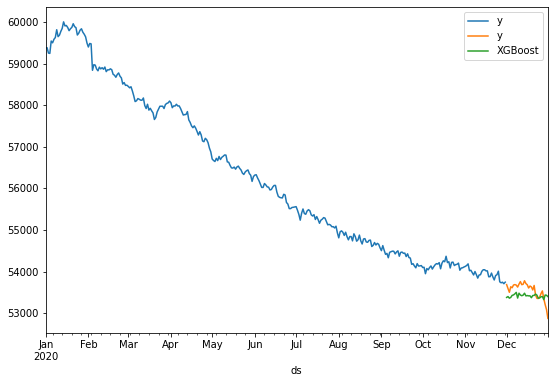

In [26]:
training_set.y['2020-01-01':].plot(figsize = (9,6), legend = True)
test_set.y.plot(legend = True)
predictions.plot(legend = True)

In [27]:
#MAPE
from sklearn.metrics import mean_absolute_percentage_error
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(MAPE(test_set.y, predictions))
print(mean_absolute_percentage_error(test_set.y, predictions))


0.38672410344589997
0.003867241034459
